** Python - jupyer notebooks advantages for analysts **

* Vast amount of libraries
* Broad range of functionalities
* Can handle huge amount of data (vs Excel for example)
* Easily reproductible
* Debug is easy


** Your firends **

* Python documentation
* Alt + tab : direct link to documentation from notebook
* Stackoverflow: people most probably already had and solved your issue





In [60]:
import pandas as pd
import numpy as np
import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
%matplotlib inline

# Import data

In [2]:
categories_df = pd.read_csv('data/categories.csv')
groups_topics_df = pd.read_csv('data/groups_topics.csv', encoding='latin1')
cities_df = pd.read_csv('data/cities.csv')
events_df = pd.read_csv('data/events.csv')
topics_df = pd.read_csv('data/topics.csv', encoding='latin1')
venues_df = pd.read_csv('data/venues.csv', encoding='latin1')
groups_df = pd.read_csv('data/groups.csv')

# Time insights

### Most common day time

In [3]:
#Convert event time to datetime
events_df['event_time'] = events_df['event_time'].apply(lambda s: datetime.datetime.strptime(str(s),'%Y-%m-%d %H:%M:%S'))

In [4]:
events_df['event_hour'] = events_df['event_time'].apply(lambda d: d.hour)

<Container object of 18 artists>

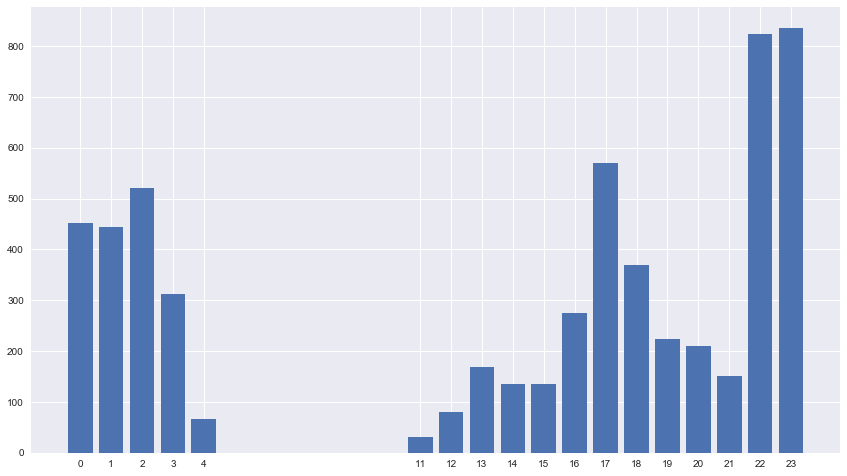

In [62]:
#Plot evolution per hour
events_per_hour = events_df[['event_hour','event_id']].groupby('event_hour').count()
events_per_hour.rename(columns={'event_id':'count_event_hour'},inplace=True)
events_per_hour.reset_index(inplace=True)

fig, ax = plt.subplots(figsize = (14.5,8.2))

x_axis = events_per_hour['event_hour']
y1 = events_per_hour['count_event_hour']

# Make the y-axis label, ticks and tick labels match the line color.
ax.set_xticks(x_axis)

ax.bar(x_axis, y1, label='Number of events per hour')

In [6]:
#Glance at utc_offset
events_df['utc_offset'].head(5)

0   -25200
1   -25200
2   -25200
3   -25200
4   -28800
Name: utc_offset, dtype: int64

In [7]:
events_df['event_hour_with_utcoffset'] = events_df.apply(lambda r: (r['event_time'] + datetime.timedelta(seconds=int(r['utc_offset']))).hour,axis=1)

<Container object of 17 artists>

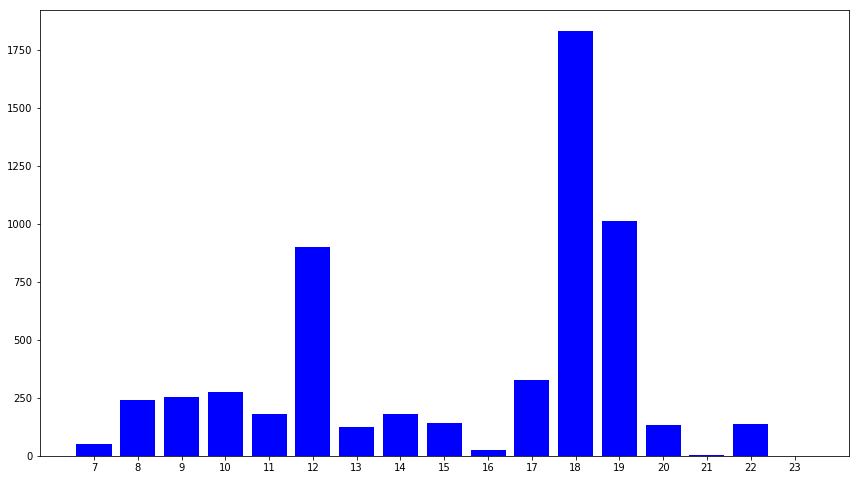

In [8]:
#Plot evolution per hour
events_per_hour_offset = events_df[['event_hour_with_utcoffset','event_id']].groupby('event_hour_with_utcoffset').count()
events_per_hour_offset.rename(columns={'event_id':'count_event_hour'},inplace=True)
events_per_hour_offset.reset_index(inplace=True)

fig, ax = plt.subplots(figsize = (14.5,8.2))

x_axis = events_per_hour_offset['event_hour_with_utcoffset']
y1 = events_per_hour_offset['count_event_hour']

# Make the y-axis label, ticks and tick labels match the line color.
ax.set_xticks(x_axis)

ax.bar(x_axis, y1,color='blue', label='Number of events per hour')

In [9]:
#Max and min time
events_df['event_time'].max(),events_df['event_time'].min()

(Timestamp('2018-10-25 23:00:00'), Timestamp('2017-10-24 11:00:00'))

In [10]:
#Construct time features
events_df['event_day'] = events_df['event_time'].apply(lambda d: d.replace(hour=0,minute=0,second=0))
events_df['event_week'] = events_df['event_day'].apply(lambda d: d - datetime.timedelta(d.weekday()))
events_df['event_weekday'] = events_df['event_day'].apply(lambda d: d.weekday())

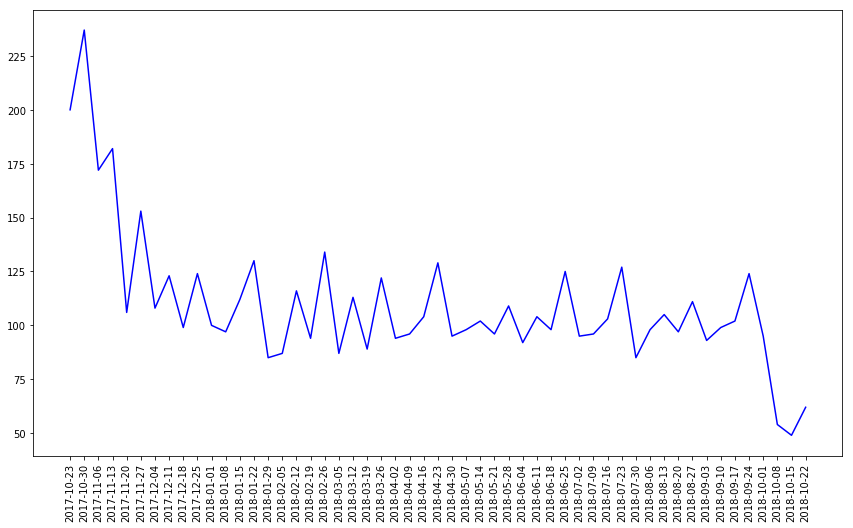

In [16]:
#Plot evolution per week
events_per_week = events_df[['event_week','event_id']].groupby('event_week').count()
events_per_week.rename(columns={'event_id':'count_event_week'},inplace=True)
events_per_week.reset_index(inplace=True)

fig, ax = plt.subplots(figsize = (14.5,8.2))

x_axis = np.array([date2num(date) for date in events_per_week['event_week']])
y1 = events_per_week['count_event_week']

# Make the y-axis label, ticks and tick labels match the line color.
ax.set_xticks(x_axis)
ax.set_xticklabels(
        [date.strftime("%Y-%m-%d") for date in events_per_week['event_week']]
        ,rotation=90)

ax.plot(x_axis, y1,color='blue', label='Number of events per week')

<Container object of 7 artists>

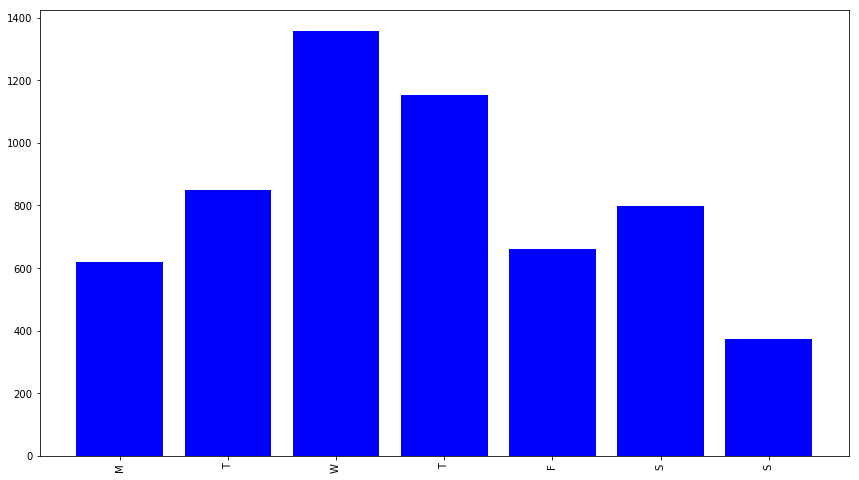

In [17]:
#Plot evolution per day
events_per_weekday = events_df[['event_weekday','event_id']].groupby('event_weekday').count()
events_per_weekday.rename(columns={'event_id':'count_event_weekday'},inplace=True)
events_per_weekday.reset_index(inplace=True)

fig, ax = plt.subplots(figsize = (14.5,8.2))

x_axis = events_per_weekday['event_weekday']
y1 = events_per_weekday['count_event_weekday']

# Make the y-axis label, ticks and tick labels match the line color.
ax.set_xticks(x_axis)
ax.set_xticklabels(
        ['M','T','W','T','F','S','S']
        ,rotation=90)

ax.bar(x_axis, y1,color='blue', label='Number of events per weekday')

# Events topics popularity

In [18]:
#Select only one topic per group
groups_topics_unique_df = groups_topics_df.drop_duplicates(subset=['group_id'])

In [19]:
#Compare shapes of the two dataframes
groups_topics_df.shape, groups_topics_unique_df.shape

((31212, 4), (11876, 4))

In [20]:
#Join events and groups
events_enriched_df = pd.merge(events_df[['event_id','group_id','yes_rsvp_count','waitlist_count','event_time']]
                              ,groups_topics_unique_df[['group_id','topic_name','topic_id']]
                              ,on ='group_id' , how='left' )

In [21]:
#Count unique topic_names within dataframe
events_enriched_df['topic_name'].drop_duplicates().count()

59

In [22]:
#Top 10 topics
top10_topics_1 = events_enriched_df[['event_id','topic_id','topic_name']].groupby(['topic_id','topic_name']).count()
top10_topics_1.rename(columns={'event_id':'count_event_per_topic'}, inplace=True)
top10_topics_1.reset_index(inplace=True)
top10_topics_1.head(5)

,topic_id,topic_name,count_event_per_topic
0,183.0,Spanish Language,5
1,206.0,Digital Photography,25
2,223.0,Photography,253
3,225.0,Ceramic Arts,13
4,387.0,Theater Industry,50


In [23]:
#Create list of top10 topic_id from dataframe
top10_topics_2 = top10_topics_1.sort_values(by='count_event_per_topic', ascending=False)
top10_topics_2.head(10)

,topic_id,topic_name,count_event_per_topic
33,15720.0,Professional Networking,1433
12,4422.0,Social Networking,543
10,1502.0,Art,438
31,15405.0,Business Referral Networking,367
2,223.0,Photography,253
28,15321.0,Literature,217
26,10581.0,Social,190
42,17558.0,Performing Arts,178
15,9696.0,New Technology,169
36,16389.0,Fine Arts,116


In [24]:
#Create list of top10 topics
top10_topics_list = top10_topics_2.head(10)['topic_id'].values
top10_topics_list

array([ 15720.,   4422.,   1502.,  15405.,    223.,  15321.,  10581.,
        17558.,   9696.,  16389.])

In [25]:
#Filter events which topic is in top10
events_top10_df = events_enriched_df[events_enriched_df['topic_id'].isin(top10_topics_list)].copy()
#Compare shapes
events_enriched_df.shape[0], events_top10_df.shape[0]

(5807, 3904)

In [26]:
#Create an array
x_axis = [i for i in range(10)]
x_axis

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<Container object of 10 artists>

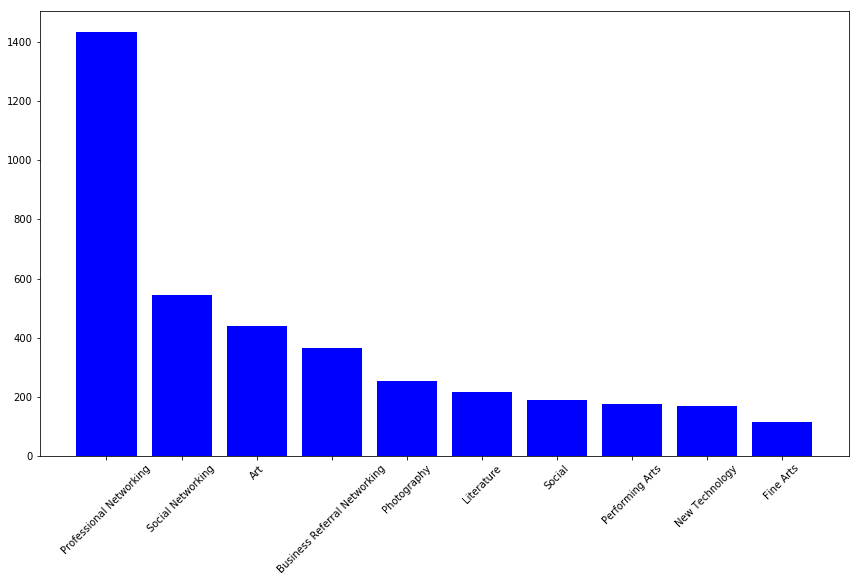

In [27]:
fig, ax = plt.subplots(figsize = (14.5,8.2))

x_axis_labels = top10_topics_2.head(10)['topic_name']
x_axis = [i for i in range(10)]
y1 = top10_topics_2.head(10)['count_event_per_topic']

ax.set_xticks(x_axis)
ax.set_xticklabels(x_axis_labels
        ,rotation=45)

ax.bar(x_axis, y1,color='blue', label='Number of events per weekday')

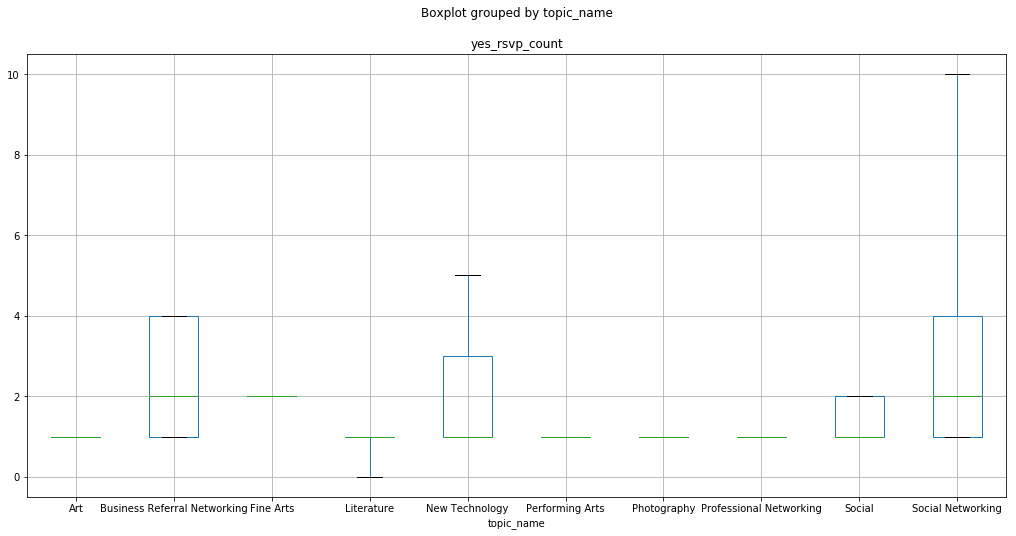

In [59]:
#Boxplot functions
plot = events_top10_df.boxplot(column=['yes_rsvp_count']\
                           , by='topic_name', showfliers = False, showmeans = False, figsize =(17,8.2)\
                           ,whis=[20, 80])

# Filtering and functions

In [29]:
#Other filtering examples
events_filtered_1 = events_enriched_df[events_enriched_df['yes_rsvp_count']>50]
events_filtered_2 = events_df[(events_df['yes_rsvp_count']>50) & (events_df['venue.city']=='Chicago')]

In [30]:
#Function to rate popularity
def rate_popularity(r):
    if (r['yes_rsvp_count'] + r['waitlist_count']) >= 50:
        return 'High popularity'
    elif (r['yes_rsvp_count'] + r['waitlist_count']) >= 20:
        return 'Medium popularity'
    else:
        return 'Low popularity'
events_top10_df['popularity']=events_top10_df.apply(rate_popularity,axis=1)

In [31]:
#Pivot table
events_popularity_summary = events_top10_df[events_top10_df['yes_rsvp_count']>5][['event_id','popularity','topic_name']].pivot_table(
                                index='topic_name', columns='popularity', aggfunc='count')

In [32]:
events_popularity_summary

event_id                                 
popularity                   High popularity Low popularity Medium popularity
topic_name                                                                   
Art                                      1.0           18.0               2.0
Business Referral Networking             1.0           17.0              52.0
Fine Arts                                NaN            2.0               NaN
Literature                               NaN           12.0               3.0
New Technology                           7.0           18.0               9.0
Performing Arts                          NaN            1.0               NaN
Photography                             20.0            9.0               1.0
Professional Networking                  3.0           14.0               4.0
Social                                   1.0           15.0               1.0
Social Networking                        9.0           78.0              40.0

In [33]:
events_popularity_summary.fillna(0)

event_id                                 
popularity                   High popularity Low popularity Medium popularity
topic_name                                                                   
Art                                      1.0           18.0               2.0
Business Referral Networking             1.0           17.0              52.0
Fine Arts                                0.0            2.0               0.0
Literature                               0.0           12.0               3.0
New Technology                           7.0           18.0               9.0
Performing Arts                          0.0            1.0               0.0
Photography                             20.0            9.0               1.0
Professional Networking                  3.0           14.0               4.0
Social                                   1.0           15.0               1.0
Social Networking                        9.0           78.0              40.0

# Description insights

In [34]:
#import regex -> stackoverflow is your friend
import re

In [35]:
#Example
strs = 'NOTE: This event is EVERY FRIDAY!! Signup is a'
result = re.split(r'[^0-9A-Za-z]+',strs)
print(result)

['NOTE', 'This', 'event', 'is', 'EVERY', 'FRIDAY', 'Signup', 'is', 'a']


In [36]:
def count_words(s):
    if s==s:
        s_list = re.split(r'[^0-9A-Za-z]+',s)
        return len(s_list)
    else:
        return 0
events_df['words_count'] = events_df['description'].apply(count_words)

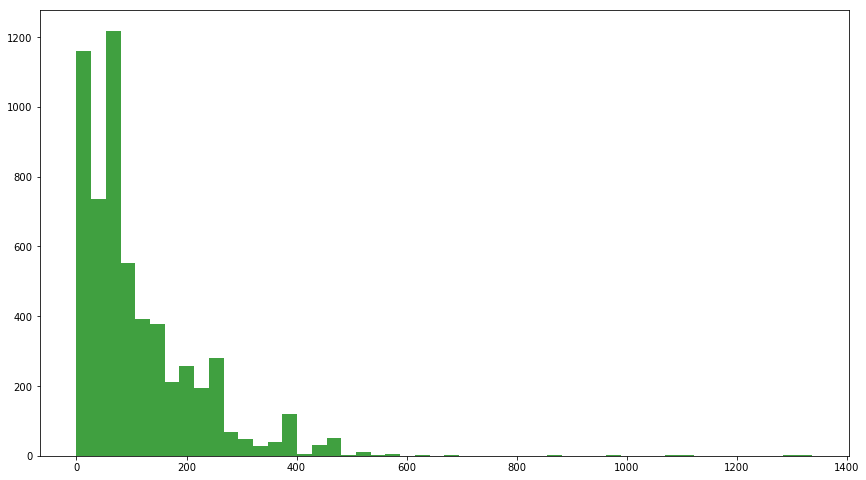

In [37]:
#Histogram
fig, ax = plt.subplots(figsize = (14.5,8.2))

ax.hist(events_df['words_count'], 50, facecolor='green', alpha=0.75)

plt.show()

# Venues insights

In [38]:
venues_df.tail(15)

,venue_id,address_1,city,country,distance,lat,localized_country_name,lon,venue_name,rating,rating_count,state,zip,normalised_rating
107078,25594207,"351 Oak Street, Chicago",Chicago,US,0.0,41.900400,USA,-87.637780,Dastorkon,0.0,0.0,not_found,-1,0.0
107079,25594260,4321 South Cottage Grove Avenue,Chicago,US,0.0,41.816143,USA,-87.606239,The Connection,0.0,0.0,not_found,-1,0.0
107080,25594276,45 west 46th street 5 floor,New York,us,0.0,40.756954,USA,-73.980720,Bench Marq Technologies / Affinity Trading,0.0,0.0,NY,10036,0.0
107081,25594369,480 Sutter Street,San Francisco,US,0.0,37.789402,USA,-122.408371,San Francisco Marriott Union Square,0.0,0.0,not_found,-1,0.0
107082,25594390,146 Essex Street,New York,US,0.0,40.720417,USA,-73.986885,Beauty & Essex,0.0,0.0,not_found,-1,0.0
107083,25594408,1217 Sutter Street,San Francisco,US,0.0,37.787579,USA,-122.420532,Rusted Mule,0.0,0.0,not_found,-1,0.0
107084,25594524,401 7th Avenue,New York,US,0.0,40.749771,USA,-73.990623,Hotel Pennsylvania,0.0,0.0,not_found,-1,0.0
107085,25594556,625 Madison Avenue,New York,US,0.0,40.763302,USA,-73.971001,Juice Press,0.0,0.0,not_found,-1,0.0
107086,25594582,1314 Ocean Avenue,San Francisco,US,0.0,37.724239,USA,-122.456764,Ocean Ale House,0.0,0.0,not_found,-1,0.0
107087,25594628,625 Columbus Avenue,New York,US,0.0,40.789299,USA,-73.969772,Trattoria iL Gusto Wine Bar,0.0,0.0,not_found,-1,0.0


In [39]:
#Venues name normalizing
def normalize_string(s):
    s_new = str(s)
    s_new = s_new.lower()
    s_new = s_new.replace('ü', 'ue')
    s_new = s_new.replace('ä', 'ae')
    s_new = s_new.replace('ß', 'ss')
    s_new = s_new.replace('ö', 'oe')
    s_new = s_new.replace('ã', 'a')
    s_new = re.sub('[^a-zA-Z0-9 \n\.]', '', s_new)
    return s_new
venues_df['venue_name_normalized']=venues_df['venue_name'].apply(normalize_string)

In [40]:
#Rating of bar, restaurant, coffee, hotel, cinema
def get_venue_type(s):
    if 'hotel' in s:
        return 'Hotel'
    elif any( k in s for k in ['bar','pub']):
        return 'Bar'
    elif any( k in s for k in ['restaurant','pizzeria','sushi'] ):
        return 'Restaurant'
    else:
        return 'Other'
venues_df['venue_type']=venues_df['venue_name_normalized'].apply(get_venue_type)

In [41]:
venues_df[['venue_id','venue_type']].groupby('venue_type').count()

,venue_id
venue_type,
Bar,6074
Hotel,1429
Other,97544
Restaurant,2046


In [44]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [57]:
venues_df[venues_df['rating_count']>0][['venue_id','venue_type','normalised_rating']].groupby('venue_type')\
            .agg({'venue_id':'count','normalised_rating':['mean','median',percentile(10),percentile(90)]})

venue_id normalised_rating                                   
              count              mean median percentile_10 percentile_90
venue_type                                                              
Bar            3489          3.265067   3.40          2.00          4.23
Hotel           806          3.344206   3.50          2.33          4.33
Other         52460          3.314451   3.33          2.40          4.36
Restaurant     1442          3.287670   3.40          2.00          4.22

# Seasonality

In [46]:
import statsmodels.api as sm

/Users/ismailbenbrahim/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [47]:
events_df.head(5)

,event_id,created,description,duration,event_url,fee.accepts,fee.amount,fee.currency,fee.description,fee.label,...,visibility,waitlist_count,why,yes_rsvp_count,event_hour,event_hour_with_utcoffset,event_day,event_week,event_weekday,words_count
0,153868222,2013-12-03 21:24:29,Solve the murder case while eating a 3 course ...,20700,https://www.meetup.com/SanFranciscoStartupFun/...,others,0.0,not_found,per person,Price,...,public,0,not_found,72,2,19,2017-10-30,2017-10-30,0,149
1,184167702,2014-05-20 18:52:00,NOTE: This event is EVERY FRIDAY!! Signup is a...,77400,https://www.meetup.com/hr-and-tech-sf/events/1...,others,0.0,not_found,per person,Price,...,public,0,not_found,179,4,21,2017-10-28,2017-10-23,5,350
2,215200502,2014-10-23 16:18:44,We'll be heading out with a group of travelers...,37800,https://www.meetup.com/hr-and-tech-sf/events/2...,others,0.0,not_found,per person,Price,...,public,0,not_found,45,3,20,2017-10-27,2017-10-23,4,351
3,220826782,2015-02-28 19:27:32,NOTE: This event is EVERY FRIDAY!! Signup is a...,113400,https://www.meetup.com/SanFranciscoStartupFun/...,others,0.0,not_found,per person,Price,...,public,0,not_found,198,4,21,2017-10-28,2017-10-23,5,350
4,227948102,2016-01-08 21:35:40,"Aussie Aussie Aussie, Oi Oi Oi! Join us for th...",36000,https://www.meetup.com/hr-and-tech-sf/events/2...,others,0.0,not_found,per person,Price,...,public,0,not_found,24,1,17,2018-01-26,2018-01-22,4,324


In [51]:
#Events per day
events_per_day = events_df[['event_day','event_id']].groupby('event_day').count()
events_per_day.rename(columns={'event_id':'count_event_day'},inplace=True)
events_per_day.reset_index(inplace=True)

In [52]:
#Seasonality calculation
res = sm.tsa.seasonal_decompose(events_per_day['count_event_day'].values,freq=7,model='multiplicative')

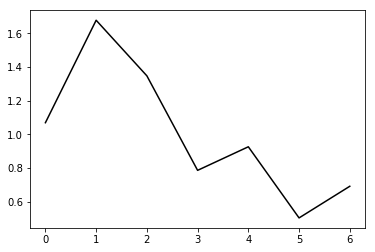

In [54]:
plt.clf()
plt.plot(res.seasonal[:7],color = 'black')
plt.show()

In [55]:
events_df[events_df['event_day']==events_df['event_day'].min()]

,event_id,created,description,duration,event_url,fee.accepts,fee.amount,fee.currency,fee.description,fee.label,...,visibility,waitlist_count,why,yes_rsvp_count,event_hour,event_hour_with_utcoffset,event_day,event_week,event_weekday,words_count
435,244370856,2017-10-20 08:34:17,https://youtu.be/4ox00JX04BY SMX EAST NYC STAR...,207900,https://www.meetup.com/buildTechNY/events/2443...,others,0.0,not_found,per person,Price,...,public,0,not_found,1,11,7,2017-10-24,2017-10-23,1,276


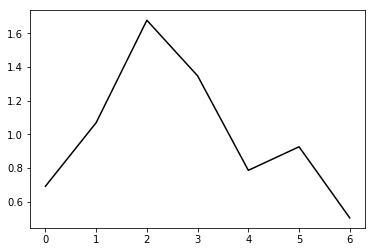

In [56]:
plt.clf()
plt.plot(res.seasonal[6:13],color = 'black')
plt.show()